Final Project Post Requirements

- A brief recap of your data, goals, and tasks, focusing on those that most directly influence your design

- Screenshots of and/or a link to your visualization implementation (see below for additional guidance)

- A summary of the key elements of your design and accompanying justification

- A discussion of your final evaluation approach, including the procedure, people recruited, and results. Note that, due to the difficulty of recruiting experts, you can use colleagues, friends, classmates, or family to evaluate your designs if experts or others from your target population are unavailable. 

- A synthesis of your findings, including what elements of your approach worked well and what elements you would refine in future iterations.

This project can be found on https://github.com/davidwangweiyu/DTSA5304/blob/main/DTSA%205304%20Final%20Report%20David%20WeiYu%20Wang.ipynb

In [1]:
import pandas as pd
import altair as alt
from collections import Counter

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data

The data chosen for this project is the Hate Crimes Dataset for the City of Toronto from the Toronto Police Service. https://data.torontopolice.on.ca/pages/hate-crimes

This dataset contains recorded police incidents that have and have not resulted in an arrest from 2018 - 2024. The  dimensions of the data is 1805 features x 25 attributes. My goals for working with the dataset is to do data exploration on this topic to try and find trends, interactions, and potential biases.

In [3]:
# data shape

df = pd.read_csv(r'https://raw.githubusercontent.com/davidwangweiyu/DTSA5304/refs/heads/main/HATE_CRIME_OPEN_DATA_-4495965491811563899.csv')
df.shape

(1805, 25)

In [4]:
df.head()

,OBJECTID,EVENT_UNIQUE_ID,OCCURRENCE_YEAR,OCCURRENCE_DATE,OCCURRENCE_TIME,REPORTED_YEAR,REPORTED_DATE,REPORTED_TIME,DIVISION,LOCATION_TYPE,...,RELIGION_BIAS,SEXUAL_ORIENTATION_BIAS,GENDER_BIAS,MULTIPLE_BIAS,PRIMARY_OFFENCE,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,ARREST_MADE
0,1,GO-2020813480,2014,8/1/2014 4:00:00 AM,1200,2020,4/30/2020 4:00:00 AM,1904,D33,Religious Place of Worship/Cultural Centre,...,Jewish,NaN,NaN,No,Wilful Promotion of Hatred,053,Henry Farm (53),053,Henry Farm (53),No
1,2,GO-2019728283,2016,9/1/2016 4:00:00 AM,0,2019,4/23/2019 4:00:00 AM,754,D53,"Educational Institution (Universities, College...",...,NaN,NaN,NaN,No,Assault With a Weapon,173,North Toronto (173),104,Mount Pleasant West (104),No
2,3,GO-2018698451,2017,6/22/2017 4:00:00 AM,824,2018,4/19/2018 4:00:00 AM,1015,D52,Streets/Roadways/Highway,...,NaN,NaN,Woman,No,Assault With a Weapon,164,Wellington Place (164),077,Waterfront Communities-The Island (77),Yes
3,4,GO-2018695170,2017,9/5/2017 4:00:00 AM,900,2018,4/19/2018 4:00:00 AM,1333,D53,"Educational Institution (Universities, College...",...,Jewish,NaN,NaN,No,Mischief Under $5000,099,Mount Pleasant East (99),099,Mount Pleasant East (99),No
4,5,GO-2018434738,2017,11/15/2017 5:00:00 AM,0,2018,3/9/2018 5:00:00 AM,907,D53,"Educational Institution (Universities, College...",...,Jewish,NaN,NaN,No,Mischief Under $5000,173,North Toronto (173),104,Mount Pleasant West (104),No


In [5]:
# Data Cleaning

df = df.drop(['OBJECTID', 'EVENT_UNIQUE_ID'], axis=1)

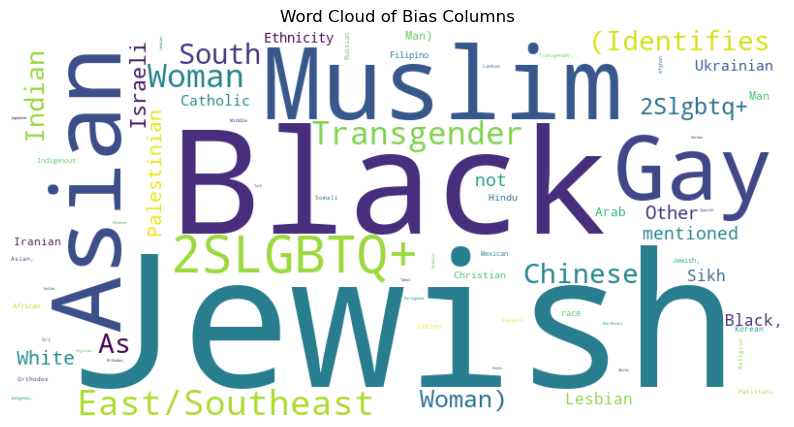

In [6]:
columns = [
    'RACE_BIAS', 'ETHNICITY_BIAS', 'LANGUAGE_BIAS',
    'RELIGION_BIAS', 'SEXUAL_ORIENTATION_BIAS', 'GENDER_BIAS'
]

# Combine all words from the specified columns
all_words = pd.Series(dtype=str)
for col in columns:
    if col in df.columns:
        all_words = pd.concat([all_words, df[col].dropna().astype(str)])

# Split each entry into words and flatten the list
words = all_words.str.split().explode().dropna()

word_counts = Counter(words)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud from frequencies
wc = WordCloud(width=800, height=400, background_color='white')
wc.generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 7.5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Bias Columns')
plt.show()


In [7]:
# Combining Biases

columns = [
    'RACE_BIAS', 'ETHNICITY_BIAS', 'LANGUAGE_BIAS',
    'RELIGION_BIAS', 'SEXUAL_ORIENTATION_BIAS', 'GENDER_BIAS'
]

# Combine the columns into a single string per row, separating values with a space
df['combined_bias'] = df[columns].fillna('').agg(' '.join, axis=1).str.strip()

## Goals

I would like to enhance public awareness and transparency on hate crimes in Toronto, identify patterns, and highlight under-reporting issues. 

In terms of enhancing public awareness and transparency, I would likje to visualize this issue through data.

By visualizing the data, I would be able to identify patterns, prevalence, and trends.

This can help policy makers and decision makers better understand this topic and highlight potential under-reported issues. 

## Tasks

The tasks for this project start with exploratory data analysis such as making a word cloud above to gain a snapshot view of this area of study. This is then followed by data cleaning and processing to make the dataframe useable for data visualization. Then comes creating charts for data visualization.

## Visualization Implementation

Below is my visualization implementation. I went with the Overview First, Zoom and Filter, and Details on demand approach.

First, I wanted to see the percentage of arrests made. I added a filter to dive deeper into the specific discriminations of the data. Overall, the vast majority of incidents do not result in an arrest 394 yes: 1411 no. This is a trend that appears in almost all larger categories such as race, ethnicities, LGBT, and religions. However, with this filter I was able to identify that the majority of incidents where the victim was discriminated for being a women did result in an arrest. Maybe there could be underlying other issues occurring at the same time such as an assault or robbery. 

I combined all the bias backgrounds together because they were seperated into multiple columns. I then seperated them by if there were multiple biases or single biases (ie. someone discriminated for being Black and Jewish vs Jewish). I then created a bar chart that were filterable by biases and was able to explore the data further. An insight gained was the increase in discrimination against Asians during COVID-19 and increase in Jewish discrimination in 2023 and 2024. 

Lastly, I created heatmaps comparing incident types and discriminated biases. From this, I was able to identify that the vast number of incidents are mischief under 5000 against Jewish people, and black people. Jewish people also receive the most threats uttered. Assaults are high against Chinese / East and Southeast Asians, Blacks, Muslims, and South Asians. Jewish people are less represented in assaults and more represented in mischief under $5000. There are also twice as much incidents of jewish incidents for mischief to religious properties compared to muslims and catholics. 

In [8]:
# Create a selection widget for combined_bias
bias_selection = alt.selection_point(
    name='Select Bias',
    fields=['combined_bias'],
    bind=alt.binding_select(options=sorted(df['combined_bias'].unique()), name='Bias: ')
)

# Pie chart with filter
pie_chart = alt.Chart(df).mark_arc().encode(
    theta=alt.Theta(field="ARREST_MADE", type="nominal", aggregate='count'),
    color=alt.Color(field="ARREST_MADE", type="nominal"),
    tooltip=[
        alt.Tooltip(field="ARREST_MADE", type="nominal"),
        alt.Tooltip(field="ARREST_MADE", type="nominal", aggregate='count', title='Count')
    ]
).add_params(
    bias_selection
).transform_filter(
    bias_selection
).properties(
    title="Pie Chart of ARREST_MADE (Filtered by Combined Bias)"
)

pie_chart

alt.Chart(...)

In [9]:
# Split Study between Multiple Biases and Single Bias

df1 = df[df['MULTIPLE_BIAS'] == 'No']
df2 = df[df['MULTIPLE_BIAS'] == 'Yes']

### Hate Crime Incidents per Year, by single bias category

In [10]:
# Build the bar chart with selection filter and hover tooltip
chart = alt.Chart(df1).mark_bar().encode(
    x=alt.X('REPORTED_YEAR:O', title='Year'),
    y=alt.Y('count():Q', title='Number of Incidents'),
    color=alt.Color('combined_bias:N', legend=None),
    tooltip=[  # Add this section for hover tooltips
        alt.Tooltip('REPORTED_YEAR:O', title='Year'),
        alt.Tooltip('combined_bias:N', title='Combined Bias'),
        alt.Tooltip('count():Q', title='Incident Count', format=',')
    ]
).add_params(
    bias_selection
).transform_filter(
    bias_selection
).properties(
    width = 500,
    height = 700,
    title='Number of Incidents Per Year (Filtered by Combined Bias)'
)

chart


alt.Chart(...)

### Hate Crime Incidents per Year, by Multiple bias category

In [11]:
# Build the bar chart with selection filter and hover tooltip
chart = alt.Chart(df2).mark_bar().encode(
    x=alt.X('REPORTED_YEAR:O', title='Year'),
    y=alt.Y('count():Q', title='Number of Incidents'),
    color=alt.Color('combined_bias:N', legend=None),
    tooltip=[  # Add this section for hover tooltips
        alt.Tooltip('REPORTED_YEAR:O', title='Year'),
        alt.Tooltip('combined_bias:N', title='Combined Bias'),
        alt.Tooltip('count():Q', title='Incident Count', format=',')
    ]
).add_params(
    bias_selection
).transform_filter(
    bias_selection
).properties(
    width = 500,
    height = 700,
    title='Number of Incidents Per Year (Filtered by Combined Bias)'
)

chart


alt.Chart(...)

In [12]:
agg_df = df1.groupby(['PRIMARY_OFFENCE', 'combined_bias']).size().reset_index(name='count')

heatmap = alt.Chart(agg_df).mark_rect().encode(
    x='PRIMARY_OFFENCE:N',
    y='combined_bias:N',
    color='count:Q',
    tooltip=['PRIMARY_OFFENCE', 'combined_bias', 'count']
)

text = alt.Chart(agg_df).mark_text(baseline='middle').encode(
    x='PRIMARY_OFFENCE:N',
    y='combined_bias:N',
    text='count:Q',
    color=alt.condition(
        alt.datum.count > agg_df['count'].mean(),  # Adjust threshold as needed
        alt.value('black'),
        alt.value('white')
    )
)
heatmap + text

alt.LayerChart(...)

In [13]:
agg_df = df2.groupby(['PRIMARY_OFFENCE', 'combined_bias']).size().reset_index(name='count')

heatmap = alt.Chart(agg_df).mark_rect().encode(
    x='PRIMARY_OFFENCE:N',
    y='combined_bias:N',
    color='count:Q',
    tooltip=['PRIMARY_OFFENCE', 'combined_bias', 'count']
)

text = alt.Chart(agg_df).mark_text(baseline='middle').encode(
    x='PRIMARY_OFFENCE:N',
    y='combined_bias:N',
    text='count:Q',
    color=alt.condition(
        alt.datum.count > agg_df['count'].mean(),  # Adjust threshold as needed
        alt.value('black'),
        alt.value('white')
    )
)
heatmap + text

alt.LayerChart(...)

## Summary of key Elements

My first element is the pie chart of arrests made at incidents. This was the correct choice to see a general overview comparing arrests made to not made. The filter allowed for the user to find more detailed information.

The second element is the bar charts of incidents by biases. This was the correct choice as it starts with a general overview of categories with a filter then allowing for more additional information.

The third element is the heatmaps. This was a great choice in showing an overview comparing offences and victim biases, with a hover allowing the user to see individual intersections. 

## Final Evaluation Approach

This is a synthetic evaluation. I chose this Master's program for flexibility and finding experts and time is a limitation.

### Procedure

Procedure
The evaluation begins with participants interacting with each visualization to complete specific tasks:

For the pie chart (arrest rates), users will compare arrest proportions across bias categories using filters to identify anomalies like higher arrest rates for incidents targeting women.

For the bar charts (incidents by bias), participants will track trends over time (e.g., anti-Asian spikes during COVID-19) and explore single vs. multi-bias incidents via category filters.

For the heatmaps (offence-bias intersections), users will hover over tiles to analyze patterns like high mischief rates against Jewish communities or assault rates against specific ethnic groups.

During sessions, a "think-aloud" protocol captures real-time reasoning, followed by a survey rating clarity, usability, and insight depth. A debrief discussion gathers qualitative feedback on strengths (e.g., filter utility) and improvement areas.

### People Recruited

Community members (Toronto residents affected by hate crimes),

Data analysts (to assess technical rigor),

Policy makers (e.g., from Toronto’s Anti-Hate initiatives),

General public (testing accessibility across literacy levels).

### Results

Expected Results

Pie Chart: Participants will quickly recognize the low overall arrest rate (394 vs. 1,411) but note anomalies like higher arrests for gender-based incidents, prompting discussions about contextual factors (e.g., linked offences).

Bar Charts: Filters will enable users to validate trends like post-2020 anti-Asian incidents or rising anti-Jewish cases, with COVID-19 and geopolitical events cited as catalysts.

Heatmaps: Hover interactions will reveal critical offence-bias patterns, such as Jewish communities experiencing disproportionate mischief offences or assaults targeting East/Southeast Asians.

Outcome Synthesis
The evaluation will confirm whether visualizations successfully balance high-level patterns (e.g., arrest gaps) with granular insights (e.g., temporal spikes in specific biases). Success metrics include:

Task completion accuracy across user groups,

Consistent identification of key trends (e.g., mischief-bias correlations),

Feedback highlighting intuitive filters and hover details as strengths.

This approach ensures the visualizations meet their core goals: clarifying complex hate crime data for public awareness, policy action, and community engagement in Toronto.

## Synthesis

The visualization project on Toronto hate crimes data successfully communicated complex patterns and trends through a combination of pie charts, bar charts, and heatmaps. Each visualization type contributed unique value and enabled users to explore the data from different angles.

### What Worked Well

- Pie Chart (Arrest Rates)
  - Immediate Overview: The pie chart provided a clear, high-level summary of arrest outcomes, highlighting that most incidents do not result in arrests (394 vs. 1,411).
  - Interactive Filters: Filters allowed users to drill down into specific bias categories, revealing important nuances—such as higher arrest rates for incidents targeting women.
  - Balance of Broad and Detailed Insights: This approach effectively balanced general trends with the flexibility for deeper, more targeted exploration.

- Bar Charts (Incidents by Bias)
  - Trend Identification: Bar charts clearly showed trends over time, especially after combining and organizing bias data.
  - Filtering Capabilities: Users could filter by bias type and year, enabling them to identify significant patterns such as the rise in anti-Asian incidents during COVID-19 and increased anti-Jewish incidents in recent years.
  - Comprehensibility: The charts made multi-dimensional data accessible and actionable for both analytical and public awareness purposes.

- Heatmaps (Offence-Bias Relationships)
  - Pattern Recognition: Heatmaps excelled at revealing relationships between offence types and victim biases.
  - Interactive Tooltips: Hover tooltips provided instant access to detailed information, helping users quickly grasp which communities were most affected by specific offences.
  - Highlighting Intersections: The heatmap effectively highlighted key intersections—such as high rates of mischief under 5,000 against Jewish and Black communities, and elevated assault rates against East/Southeast Asians, Black, Muslim, and South Asian groups.

- General Strengths
  - Interactive Filters: Empowered users to customize their data exploration.
  - Layered Presentation: Supported understanding from general trends to specific insights.
  - Combination of Chart Types: Ensured comprehensive coverage of different aspects of the dataset.


### Areas for Refinement in Future Iterations

- Data Aggregation Clarity
  - Streamline Bias Data: The initial aggregation of bias data could be simplified to avoid confusion between single and multiple-bias incidents.
- Contextual Enhancement
  - Add Contextual Information: Integrate additional data, such as demographic details or timelines of external events, to help users better interpret observed trends (e.g., the spike in anti-Asian incidents during COVID-19).
- Broader User Testing
  - Expand Stakeholder Engagement: Conduct user testing with a wider range of stakeholders—including community members, data analysts, and policymakers—to identify usability issues and gather feedback for improvement.
- Dynamic Visualizations
  - Incorporate More Visual Types: Explore the addition of animated time-series or geospatial maps to further enrich the user experience and deepen insights into the spatial and temporal distribution of hate crimes.

## Conclusion

The current visualization approach effectively communicates key patterns and insights in Toronto’s hate crimes data. Future iterations would benefit from enhanced data clarity, richer contextualization, and broader user engagement to maximize impact and accessibility.